<div class="alert alert-info" >
    
# <div class="alert alert-success" >The mathematical building blocks of neural networks (part 2)

# <div class= "alert alert-warning"> Tensors </div>
    
Multidimensional Numpy arrays are also called tensors. In general, all current machine-learning systems use tensors
as their basic data structure. Tensors are fundamental to the field—so fundamental that Google’s TensorFlow was named after them.
    
#### So what’s a tensor?
At its core, a tensor is a container for data—almost always numerical data. So, it’s a container for numbers. You may be already familiar with matrices(aka 2D tensors). Tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

### <div class= "alert alert-success">Scalars (0 D tensors)
A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional tensor, or 0D tensor). `In Numpy, a float32 or float64 number is a scalar tensor ` (or scalar array). You can display the number of axes of a Numpy tensor via the ndim attribute; `a scalar tensor has 0 axes (ndim == 0). The number of axes of a tensor is also called its rank`.
Here’s a Numpy scalar:

In [1]:
import numpy as np
x = np.array(12)
print('scalar tensor: ',x)
print('scalar tensor dimension: ',x.ndim)

scalar tensor:  12
scalar tensor dimension:  0


### <div class= "alert alert-success"> Vectors (1D tensors)
An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis. Following is a Numpy vector:

In [2]:
x = np.array([12, 3, 6, 14])
print('1D tensor: ',x)
print('1D tensor dimension: ',x.ndim)

1D tensor:  [12  3  6 14]
1D tensor dimension:  1


This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D vector with a 5D tensor! `A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis)`.

Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless.

### <div class= "alert alert-success"> Matrices (2D tensors)
An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns). You can visually interpret a matrix as a rectangular grid of numbers. This is a Numpy matrix:

In [3]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
x.ndim

2

The entries from the first axis are called the rows, and the entries from the second axis are called the columns. In the previous example, [5, 78, 2, 34, 0] is the first row of x, and [5, 6, 7] is the first column.

### <div class= "alert alert-success">3D tensors and higher-dimensional tensors
If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. Following is a Numpy 3D tensor:

In [4]:
x = np.array([[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]]])
x.ndim

3

By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you process video data.

### <div class= "alert alert-success"> Key attributes</div>
A tensor is defined by three key attributes:
###### 1) Number of axes (rank):

For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

###### 2) Shape:

This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, (). 

###### 3)  Data type (usually called dtype in Python libraries):

This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:


In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print("train_images dimensions/axis:  ",train_images.ndim)  # the number of axes of the tensor train_images, the ndim attribute

print("train_images shape:  ",train_images.shape)           # the tensor train_images shape 3D Tensor 

print("train_images data type:  ",train_images.dtype)       # the tensor train_images data type, the dtype attribute:

train_images dimensions/axis:   3
train_images shape:   (60000, 28, 28)
train_images data type:   uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

### <div class= "alert alert-success"> Manipulating tensors in Numpy </div>
We selected a specific digit alongside the first axis (depth for a 3D tensor is the first axis) using the syntax <b> train_images[i]</b>. `Selecting specific elements in a tensor is called tensor slicing`. Let’s look at the tensor-slicing operations you can do on Numpy arrays.

The following example selects digits 10 to 100 (100 isn’t included) and puts them in an array of shape (90, 28, 28):


In [4]:
my_slice = train_images[10:100]   # sliced the 3D tensor for train images from depth 10 to depth 99
print(my_slice.shape)

(90, 28, 28)


### <div class= "alert alert-success"> The notion of data batches </div>
    
In general, `the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension)`. In the MNIST example, samples are images of digits. In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:
    
batch = train_images[:128]
    
And here’s the next batch:
    
batch = train_images[128:256]
    
And the nth batch:
    
batch = train_images[128 * n:128 * (n + 1)]    
    
When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.   
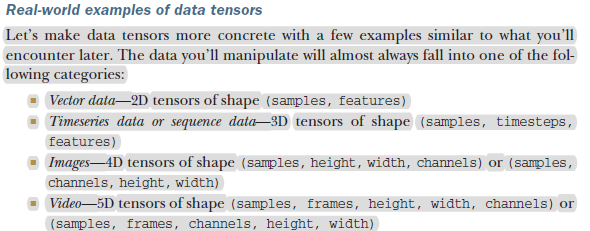
    
### Vector data
This is the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the samples axis and the second axis is the features axis. Let’s take a look at two examples:


- An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3).

- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

### Timeseries data or sequence data 
Whenever time matters in your data (or the notion of sequenceorder), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor (see figure 2.3).
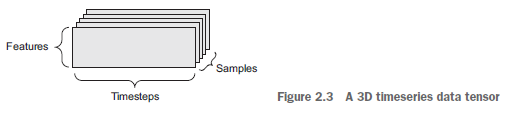

The time axis is always the second axis (axis of index 1), by convention. Let’s look at a few examples:

- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data. 

- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

### Image data
Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)
(see figure 2.4).

There are two conventions for shapes of images tensors: the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). The Tensor-Flow machine-learning framework, from Google, places the color-depth axis at the
end: (samples, height, width, color_depth). Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256) and (128, 3, 256, 256). The Keras framework provides support for both formats.

### Video data
Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a
sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth). For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a
tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much
lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format). 

# <div class= "alert alert-warning"> The gears of neural networks: tensor operations</div>
(Reffere to book)